In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.stats import boxcox
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV

In [ ]:
data = pd.read_excel('/content/PCC 18-19.xlsx')
data

,Tanggal,No Prod,SiO2,Al203,Fe203,CaO,MgO,SO3,FL,LOI,Residu,Blaine,Insol,3,7,28
0,1,1,25.32000,7.73000,3.65000,57.66000,1.02000,1.74000,1.852405,2.725639,6.452902,367.833498,12.171742,223.241592,292.558616,419.469932
1,2,2,25.33000,8.30000,3.63000,58.59000,1.07000,1.70000,2.073865,2.677858,7.148562,384.951085,11.381546,228.848116,292.558616,431.192664
2,3,3,24.41000,7.37000,3.53000,60.21000,1.15000,1.66000,1.480888,2.529241,6.360000,360.088768,9.069093,237.512744,299.184508,437.308872
3,4,4,26.68000,8.16000,3.72000,57.90000,1.12000,1.50000,1.480000,2.520000,8.280128,351.028479,14.170000,216.106016,279.816516,412.844040
4,5,5,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,27,726,21.20232,5.84573,3.13241,58.56837,1.13458,1.72713,0.352800,8.808290,6.340000,429.764962,9.283502,196.228340,276.248728,1912.334368
726,28,727,21.43080,5.87385,3.17214,59.08322,1.07676,1.67198,0.086400,8.328732,6.430000,426.392890,8.699534,179.408768,243.119268,318.042816
727,29,728,21.34252,5.85900,3.16048,59.09016,1.11006,1.78500,0.100800,8.357934,7.290000,424.496209,8.702595,185.015292,252.293580,304.791032
728,30,729,21.40269,5.99123,3.14908,58.63324,1.09012,1.81234,0.194400,8.712950,6.570000,452.805285,9.593691,178.389400,249.745160,334.352704


In [ ]:
data.isnull().sum()

Tanggal    0
No Prod    0
SiO2       0
Al203      0
Fe203      0
CaO        0
MgO        0
SO3        0
FL         0
LOI        0
Residu     0
Blaine     0
Insol      0
3          0
7          0
28         0
dtype: int64

In [ ]:
data.drop('Tanggal', axis=1, inplace=True)

In [ ]:
data

,No Prod,SiO2,Al203,Fe203,CaO,MgO,SO3,FL,LOI,Residu,Blaine,Insol,3,7,28
0,1,25.32000,7.73000,3.65000,57.66000,1.02000,1.74000,1.852405,2.725639,6.452902,367.833498,12.171742,223.241592,292.558616,419.469932
1,2,25.33000,8.30000,3.63000,58.59000,1.07000,1.70000,2.073865,2.677858,7.148562,384.951085,11.381546,228.848116,292.558616,431.192664
2,3,24.41000,7.37000,3.53000,60.21000,1.15000,1.66000,1.480888,2.529241,6.360000,360.088768,9.069093,237.512744,299.184508,437.308872
3,4,26.68000,8.16000,3.72000,57.90000,1.12000,1.50000,1.480000,2.520000,8.280128,351.028479,14.170000,216.106016,279.816516,412.844040
4,5,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,21.20232,5.84573,3.13241,58.56837,1.13458,1.72713,0.352800,8.808290,6.340000,429.764962,9.283502,196.228340,276.248728,1912.334368
726,727,21.43080,5.87385,3.17214,59.08322,1.07676,1.67198,0.086400,8.328732,6.430000,426.392890,8.699534,179.408768,243.119268,318.042816
727,728,21.34252,5.85900,3.16048,59.09016,1.11006,1.78500,0.100800,8.357934,7.290000,424.496209,8.702595,185.015292,252.293580,304.791032
728,729,21.40269,5.99123,3.14908,58.63324,1.09012,1.81234,0.194400,8.712950,6.570000,452.805285,9.593691,178.389400,249.745160,334.352704


karena banyak angka 0 dimana pada variabel indepen nya adalah 0 lalu di target nya juga 0 dan distribusi angka 0 terlalu banyak. maka variabel dengan angka 0 dan target 0 dihapus  

In [ ]:
data = data.drop(data[data[[28]].eq(0).all(axis=1)].index)

In [ ]:
data.describe()

,No Prod,SiO2,Al203,Fe203,CaO,MgO,SO3,FL,LOI,Residu,Blaine,Insol,3,7,28
count,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000
mean,416.835165,22.810148,6.395138,3.152442,56.560620,0.898915,1.776481,1.226841,7.493225,6.092311,427.307437,11.282346,199.106094,258.992641,342.684637
std,210.673551,1.922590,0.549765,0.264463,2.165716,0.161847,0.198799,0.406336,2.213673,1.599008,35.801949,2.555213,24.677748,29.837865,82.324773
min,1.000000,18.344330,5.208660,2.674810,51.130000,0.063889,1.174820,0.086400,2.227327,2.570000,313.610756,0.729416,128.440368,168.705404,242.099900
25%,272.500000,21.616095,6.048805,2.976775,55.160655,0.820085,1.619415,0.949712,5.760995,4.860000,403.497792,9.833281,183.231398,239.041796,314.475028
50%,420.000000,22.335130,6.300000,3.085250,56.281510,0.910000,1.751630,1.195200,8.256881,6.087476,429.223600,11.049118,197.757392,258.919472,335.372072
75%,615.500000,23.734385,6.619185,3.248590,57.890535,1.000000,1.929730,1.485582,9.239890,7.005000,452.499889,12.760026,214.831806,279.816516,359.327220
max,730.000000,28.810000,8.300000,4.000000,67.870000,1.342920,2.378100,3.302970,11.487026,11.884550,515.831366,19.195540,266.564732,348.114172,1912.334368


In [ ]:
data.loc[data[28] == 0].index.tolist()

[]

In [ ]:
data[data[28] > 1000]

,No Prod,SiO2,Al203,Fe203,CaO,MgO,SO3,FL,LOI,Residu,Blaine,Insol,3,7,28
725,726,21.20232,5.84573,3.13241,58.56837,1.13458,1.72713,0.3528,8.80829,6.34,429.764962,9.283502,196.22834,276.248728,1912.334368


In [ ]:
indeks = [725]
data.drop(indeks, inplace=True)

In [ ]:
data.describe()

,No Prod,SiO2,Al203,Fe203,CaO,MgO,SO3,FL,LOI,Residu,Blaine,Insol,3,7,28
count,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000
mean,416.154185,22.813689,6.396348,3.152486,56.556198,0.898396,1.776590,1.228766,7.490328,6.091765,427.302024,11.286748,199.112433,258.954632,339.227259
std,210.404033,1.923224,0.549765,0.264753,2.166048,0.161646,0.199005,0.404701,2.215252,1.600729,35.841258,2.556303,24.704600,29.859751,36.626450
min,1.000000,18.344330,5.208660,2.674810,51.130000,0.063889,1.174820,0.086400,2.227327,2.570000,313.610756,0.729416,128.440368,168.705404,242.099900
25%,270.750000,21.621445,6.051345,2.976368,55.159022,0.820043,1.619307,0.949807,5.759662,4.860000,403.497792,9.839869,183.103977,239.041796,314.475028
50%,419.500000,22.338120,6.300000,3.084610,56.272620,0.909100,1.755815,1.197600,8.255964,6.086870,429.189992,11.052998,197.757392,258.664630,335.372072
75%,614.750000,23.738588,6.619592,3.249015,57.880803,0.999938,1.929865,1.485988,9.241082,7.007500,452.523248,12.760351,214.959227,279.816516,359.327220
max,730.000000,28.810000,8.300000,4.000000,67.870000,1.342920,2.378100,3.302970,11.487026,11.884550,515.831366,19.195540,266.564732,348.114172,462.283388


In [ ]:
data.corr()

,No Prod,SiO2,Al203,Fe203,CaO,MgO,SO3,FL,LOI,Residu,Blaine,Insol,3,7,28
No Prod,1.000000,-0.615274,-0.666301,-0.467777,0.152085,0.330237,0.320308,-0.123925,0.745632,-0.409316,0.609549,-0.274371,-0.246032,-0.216904,-0.312422
SiO2,-0.615274,1.000000,0.795315,0.481150,-0.499528,0.010572,-0.276211,0.109577,-0.671216,0.279779,-0.456225,0.768277,0.040029,0.020847,0.077115
Al203,-0.666301,0.795315,1.000000,0.771145,-0.202102,-0.280394,-0.379667,0.092827,-0.705463,0.408551,-0.420438,0.624725,0.196101,0.183532,0.310446
Fe203,-0.467777,0.481150,0.771145,1.000000,0.309436,-0.383638,-0.333917,0.080327,-0.695731,0.541901,-0.506753,0.268719,0.302259,0.318575,0.407714
CaO,0.152085,-0.499528,-0.202102,0.309436,1.000000,-0.199105,-0.073582,0.118906,-0.046354,0.242246,-0.173512,-0.675303,0.267756,0.315515,0.348994
MgO,0.330237,0.010572,-0.280394,-0.383638,-0.199105,1.000000,0.368975,-0.008881,0.204581,-0.138527,0.133003,-0.021146,-0.373505,-0.286824,-0.237557
SO3,0.320308,-0.276211,-0.379667,-0.333917,-0.073582,0.368975,1.000000,-0.174392,0.278713,-0.171579,0.147191,-0.185363,-0.221584,-0.199766,-0.143131
FL,-0.123925,0.109577,0.092827,0.080327,0.118906,-0.008881,-0.174392,1.000000,-0.168810,0.164221,-0.216037,-0.042589,-0.012283,0.074672,0.119818
LOI,0.745632,-0.671216,-0.705463,-0.695731,-0.046354,0.204581,0.278713,-0.168810,1.000000,-0.434997,0.795279,-0.177542,-0.394403,-0.417698,-0.522115
Residu,-0.409316,0.279779,0.408551,0.541901,0.242246,-0.138527,-0.171579,0.164221,-0.434997,1.000000,-0.477934,0.069155,-0.066992,0.023753,0.188905


# Memisahkan variabel yang akan digunakan dan di cleansing

In [ ]:
variabel = data[['SiO2', 'Al203', 'Fe203', 'MgO',	'CaO',	'SO3',	'LOI',	'FL',	'Insol', 'Residu', 'Blaine', 28]]

In [ ]:
variabel.describe()

,SiO2,Al203,Fe203,MgO,CaO,SO3,LOI,FL,Insol,Residu,Blaine,28
count,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000
mean,22.813689,6.396348,3.152486,0.898396,56.556198,1.776590,7.490328,1.228766,11.286748,6.091765,427.302024,339.227259
std,1.923224,0.549765,0.264753,0.161646,2.166048,0.199005,2.215252,0.404701,2.556303,1.600729,35.841258,36.626450
min,18.344330,5.208660,2.674810,0.063889,51.130000,1.174820,2.227327,0.086400,0.729416,2.570000,313.610756,242.099900
25%,21.621445,6.051345,2.976368,0.820043,55.159022,1.619307,5.759662,0.949807,9.839869,4.860000,403.497792,314.475028
50%,22.338120,6.300000,3.084610,0.909100,56.272620,1.755815,8.255964,1.197600,11.052998,6.086870,429.189992,335.372072
75%,23.738588,6.619592,3.249015,0.999938,57.880803,1.929865,9.241082,1.485988,12.760351,7.007500,452.523248,359.327220
max,28.810000,8.300000,4.000000,1.342920,67.870000,2.378100,11.487026,3.302970,19.195540,11.884550,515.831366,462.283388


In [ ]:
variabel.corr()

,SiO2,Al203,Fe203,MgO,CaO,SO3,LOI,FL,Insol,Residu,Blaine,28
SiO2,1.000000,0.795315,0.481150,0.010572,-0.499528,-0.276211,-0.671216,0.109577,0.768277,0.279779,-0.456225,0.077115
Al203,0.795315,1.000000,0.771145,-0.280394,-0.202102,-0.379667,-0.705463,0.092827,0.624725,0.408551,-0.420438,0.310446
Fe203,0.481150,0.771145,1.000000,-0.383638,0.309436,-0.333917,-0.695731,0.080327,0.268719,0.541901,-0.506753,0.407714
MgO,0.010572,-0.280394,-0.383638,1.000000,-0.199105,0.368975,0.204581,-0.008881,-0.021146,-0.138527,0.133003,-0.237557
CaO,-0.499528,-0.202102,0.309436,-0.199105,1.000000,-0.073582,-0.046354,0.118906,-0.675303,0.242246,-0.173512,0.348994
SO3,-0.276211,-0.379667,-0.333917,0.368975,-0.073582,1.000000,0.278713,-0.174392,-0.185363,-0.171579,0.147191,-0.143131
LOI,-0.671216,-0.705463,-0.695731,0.204581,-0.046354,0.278713,1.000000,-0.168810,-0.177542,-0.434997,0.795279,-0.522115
FL,0.109577,0.092827,0.080327,-0.008881,0.118906,-0.174392,-0.168810,1.000000,-0.042589,0.164221,-0.216037,0.119818
Insol,0.768277,0.624725,0.268719,-0.021146,-0.675303,-0.185363,-0.177542,-0.042589,1.000000,0.069155,0.052488,-0.257483
Residu,0.279779,0.408551,0.541901,-0.138527,0.242246,-0.171579,-0.434997,0.164221,0.069155,1.000000,-0.477934,0.188905


In [ ]:
variabel.columns

Index([  'SiO2',  'Al203',  'Fe203',    'MgO',    'CaO',    'SO3',    'LOI',
           'FL',  'Insol', 'Residu', 'Blaine',       28],
      dtype='object')

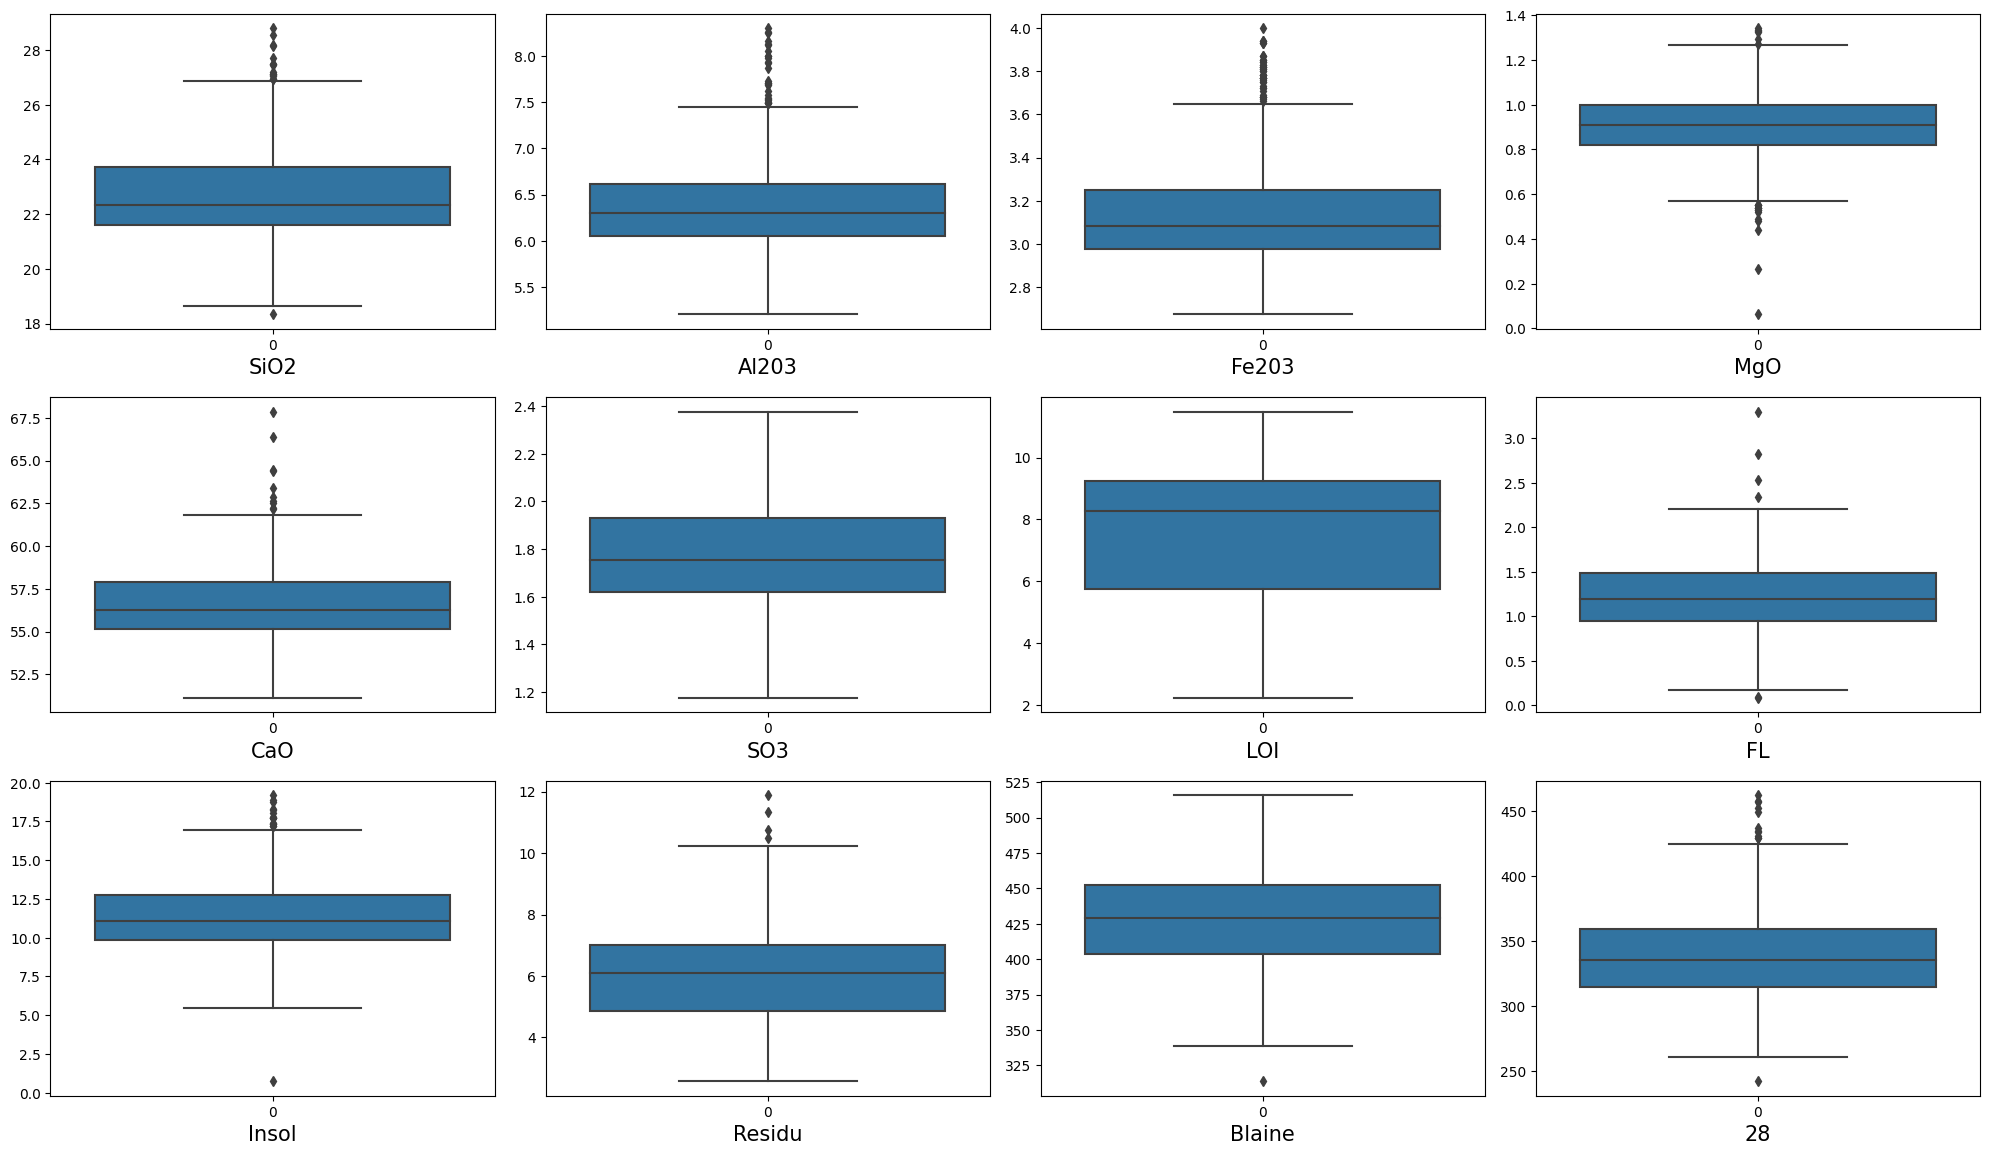

In [ ]:
plt.figure(figsize = (20, 15))
plotnumber = 1

for col in variabel.columns:
    if plotnumber <= 12:
        ax = plt.subplot(4, 4, plotnumber)
        sns.boxplot(variabel[col])
        plt.xlabel(col, fontsize = 15)

    plotnumber += 1
plt.tight_layout()
plt.show()

In [ ]:
variabel.skew()

SiO2      0.729245
Al203     1.041739
Fe203     1.221926
MgO      -0.606564
CaO       0.857592
SO3       0.188181
LOI      -0.716741
FL        0.608667
Insol     0.277911
Residu    0.548388
Blaine   -0.174230
28        0.640818
dtype: float64

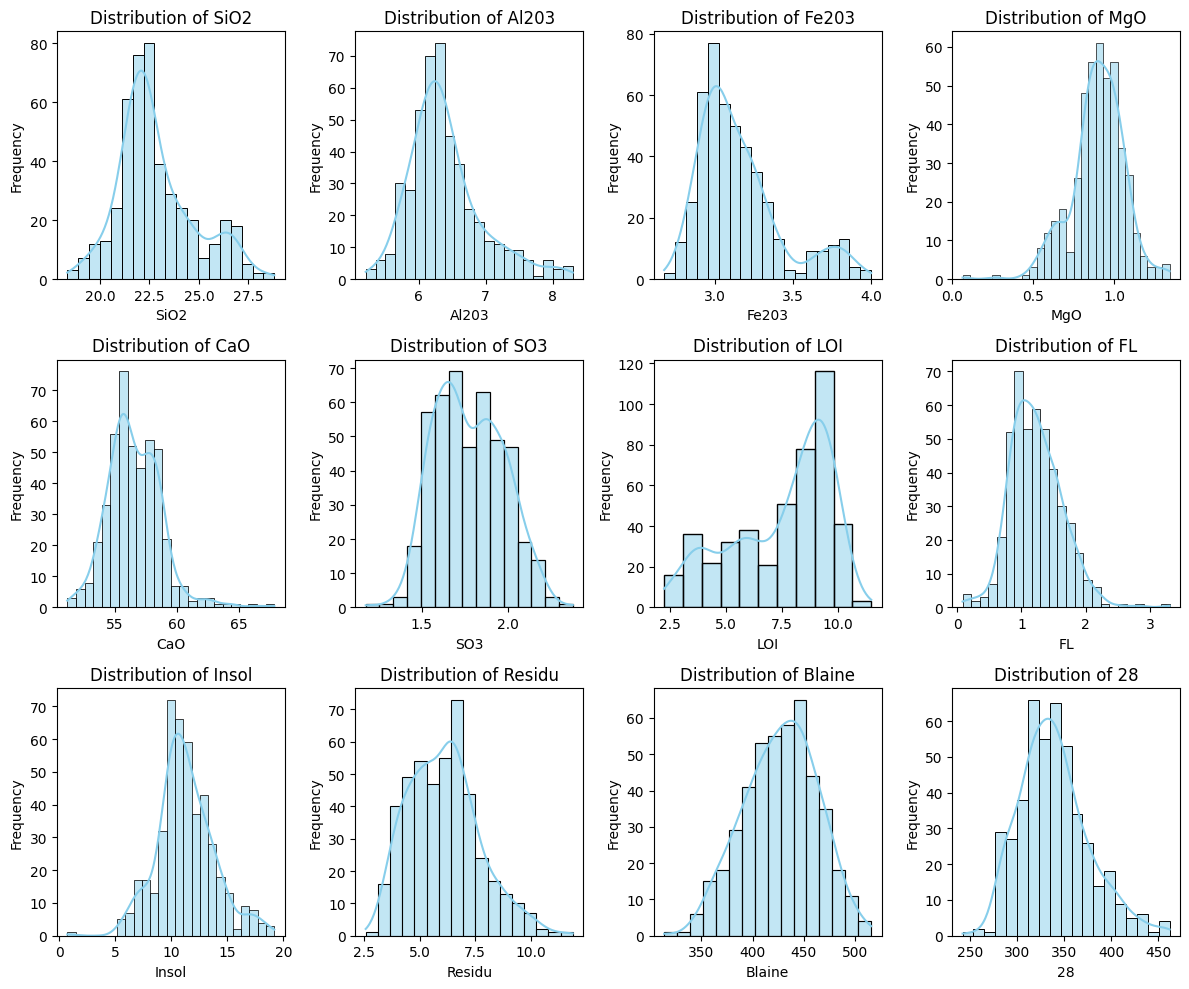

In [ ]:
plt.figure(figsize=(12, 10))
for i, col in enumerate(variabel.columns):
    plt.subplot(3, 4, i+1)
    sns.histplot(variabel[col], kde=True, color='skyblue')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title('Distribution of {}'.format(col))

plt.tight_layout()
plt.show()

In [ ]:
mean = variabel[28].mean()
std_dev = variabel[28].std()

In [ ]:
threshold = 2
lower_bound = mean - threshold * std_dev
upper_bound = mean + threshold * std_dev

In [ ]:
variabel = variabel[(variabel[28] >= lower_bound) & (variabel[28] <= upper_bound)]

In [ ]:
variabel.shape

(432, 12)

# Memisahkan kolom features dan target

In [ ]:
target = variabel[28]

In [ ]:
target = target.reset_index(drop=True)

In [ ]:
target

0      400.101940
1      380.224264
2      398.063204
3      410.295620
4      356.269116
          ...    
427    304.791032
428    318.042816
429    304.791032
430    334.352704
431    353.211012
Name: 28, Length: 432, dtype: float64

In [ ]:
features = variabel[['MgO', 'CaO', 'SO3', 'LOI',	'FL',	'Insol']]
features

,MgO,CaO,SO3,LOI,FL,Insol
6,0.89000,64.37000,1.86000,2.419758,1.926309,5.566660
7,1.03000,56.84000,1.64000,2.636572,1.553845,13.177365
8,0.91000,60.02000,1.70000,2.376198,1.555399,8.851149
11,0.93000,58.50000,1.35000,2.507743,1.406000,12.592371
12,0.94000,56.83000,1.60000,2.782765,1.782038,14.014394
...,...,...,...,...,...,...
724,1.13000,58.46000,1.76000,9.498707,0.396000,9.618623
726,1.07676,59.08322,1.67198,8.328732,0.086400,8.699534
727,1.11006,59.09016,1.78500,8.357934,0.100800,8.702595
728,1.09012,58.63324,1.81234,8.712950,0.194400,9.593691


# Normalisasi

## Outlier dan Skew

Bisa dilihat dari boxplot bahwa variabel yang memiliki permasalahan outlier di beberapa kolom. Dan sudah dilakukan beberapa normalisasi scaling seperti minmaxscaler, robustscaler dan StandardScaler. namun tidak membuat perubahan.

jika kita melihat dari skew yang terjadi pada data tidak seragam dengan rentang data yang menjadi pencilan sangat beragam dan tidak sedikit. sehingga saya hanya akan menghapus data dengan melihat distribusi variabel target nya saja dimana angka ekstrem yang menjadi pencilan dan kemungkinan akan terjadi di real time sangat kecil.

In [ ]:
# for column in features.columns:
#     if column not in ['MgO', 'LOI']:
#         features[column] += 1
#         features[column] = np.log(features[column])

### Melihat kembali skew dan outlier

In [ ]:
features.skew()

MgO     -0.655537
CaO      0.800604
SO3      0.160332
LOI     -0.774361
FL       0.647945
Insol    0.462370
dtype: float64

In [ ]:
target.skew()

0.2871758698397834

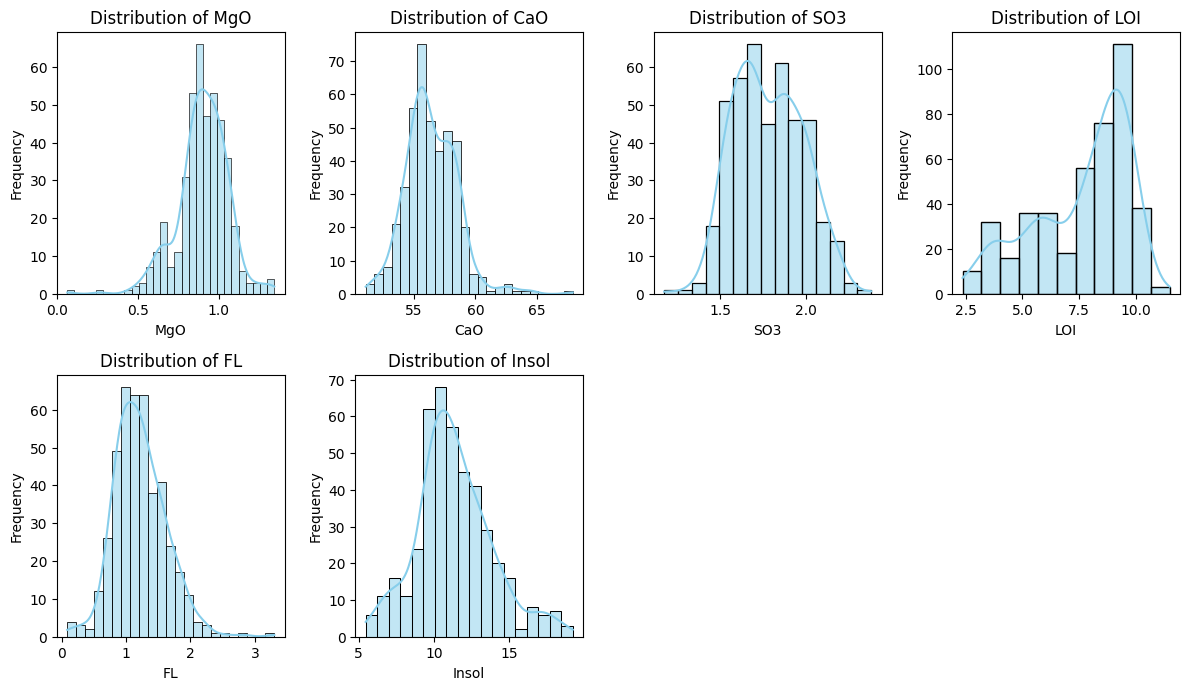

In [ ]:
plt.figure(figsize=(12, 10))
for i, col in enumerate(features.columns):
    plt.subplot(3, 4, i+1)
    sns.histplot(features[col], kde=True, color='skyblue')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title('Distribution of {}'.format(col))

plt.tight_layout()
plt.show()

In [ ]:
features = features.reset_index(drop=True)

In [ ]:
features

,MgO,CaO,SO3,LOI,FL,Insol
0,0.89000,64.37000,1.86000,2.419758,1.926309,5.566660
1,1.03000,56.84000,1.64000,2.636572,1.553845,13.177365
2,0.91000,60.02000,1.70000,2.376198,1.555399,8.851149
3,0.93000,58.50000,1.35000,2.507743,1.406000,12.592371
4,0.94000,56.83000,1.60000,2.782765,1.782038,14.014394
...,...,...,...,...,...,...
427,1.13000,58.46000,1.76000,9.498707,0.396000,9.618623
428,1.07676,59.08322,1.67198,8.328732,0.086400,8.699534
429,1.11006,59.09016,1.78500,8.357934,0.100800,8.702595
430,1.09012,58.63324,1.81234,8.712950,0.194400,9.593691


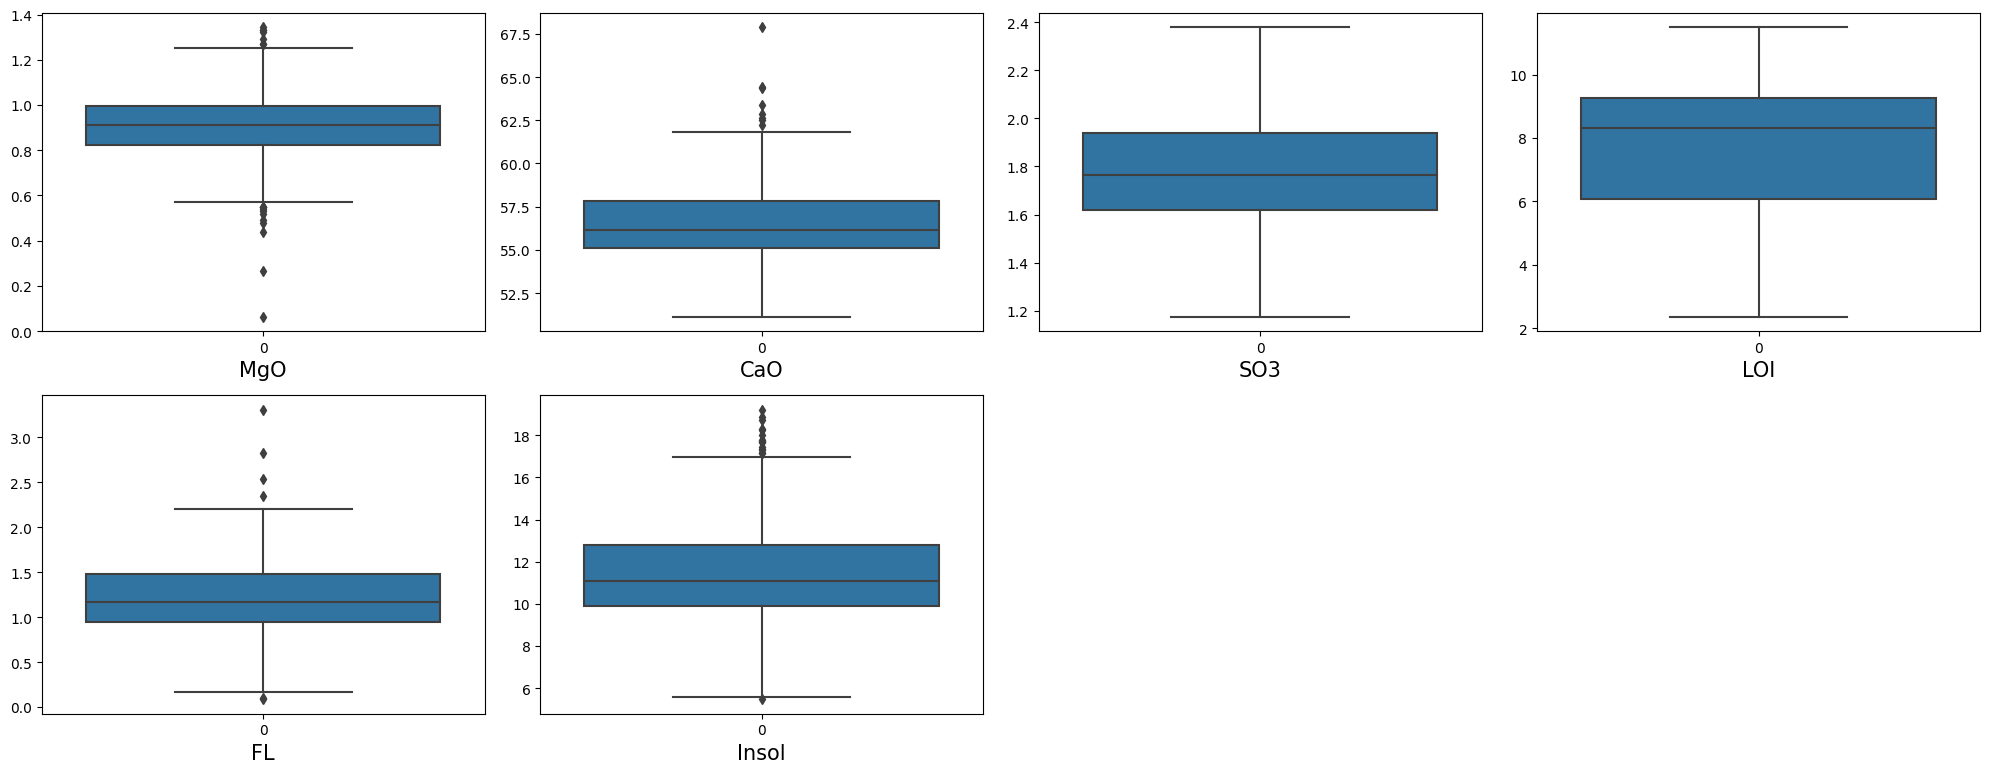

In [ ]:
plt.figure(figsize = (20, 15))
plotnumber = 1

for col in features.columns:
    if plotnumber <= 12:
        ax = plt.subplot(4, 4, plotnumber)
        sns.boxplot(features[col])
        plt.xlabel(col, fontsize = 15)

    plotnumber += 1
plt.tight_layout()
plt.show()

# split data

In [ ]:
test_size = 0.4
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=test_size, random_state=42)

In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Model

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
modell = LinearRegression()

# Latih model dengan data
X = features
y = target
modell.fit(X, y)

# Lihat R-squared
r2 = modell.score(X, y)
print(f'R-squared (R^2): {r2:.4f}')

R-squared (R^2): 0.3555


In [ ]:
coefficients = modell.coef_
print("Koefisien Regresi:")
for feature, coef in zip(X.columns, coefficients):
    print(f"{feature}: {coef:.4f}")

Koefisien Regresi:
MgO: -18.7519
CaO: 1.4187
SO3: 5.9347
LOI: -7.6158
FL: -0.5737
Insol: -4.0594


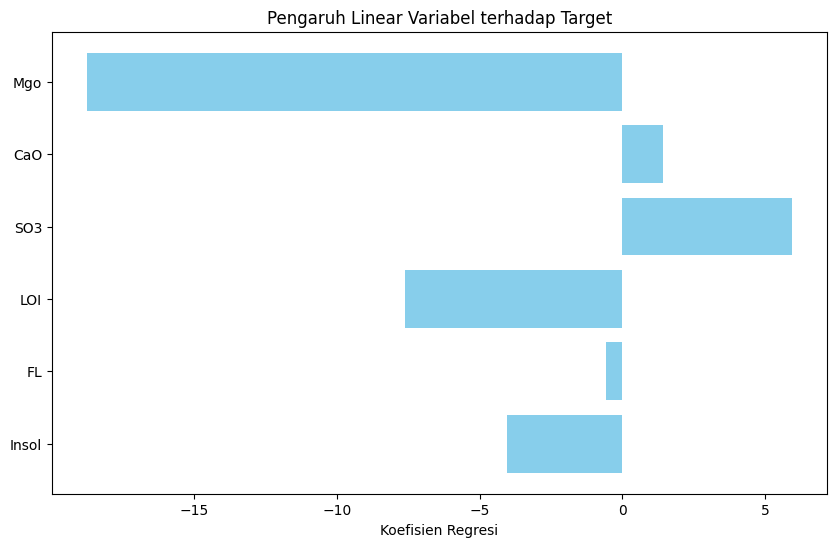

In [ ]:
coeff = np.array([-18.7519, 1.4187, 5.9347, -7.6158, -0.5737, -4.0594])
fitur = ['Mgo', 'CaO', 'SO3', 'LOI', 'FL', 'Insol']

plt.figure(figsize=(10, 6))
plt.barh(fitur, coeff, color='skyblue')
plt.xlabel('Koefisien Regresi')
plt.title('Pengaruh Linear Variabel terhadap Target')
plt.gca().invert_yaxis()  # Membalikkan urutan agar variabel teratas ditampilkan terlebih dahulu
plt.show()

In [ ]:
XX = variabel[['SiO2', 'Al203', 'Fe203', 'MgO',	'CaO',	'SO3',	'LOI',	'FL',	'Insol', 'Residu', 'Blaine']]  # Gantilah dengan nama fitur yang sesuai
yy = target  # Gantilah dengan nama kolom target yang sesuai

In [ ]:
XX.shape

(432, 11)

In [ ]:
yy.shape

(432,)

In [ ]:
modell.fit(XX, yy)

# Lihat R-squared
r2 = modell.score(XX, yy)
print(f'R-squared (R^2): {r2:.4f}')

R-squared (R^2): 0.4352


regresi linier

In [ ]:
# Inisialisasi model
linear_model = LinearRegression()

# Latih model
linear_model.fit(X_train, y_train)

# Prediksi nilai target pada data uji
y_test_pred_linear = linear_model.predict(X_test)

# Evaluasi model
mse_linear = mean_squared_error(y_test, y_test_pred_linear)
r2_linear = r2_score(y_test, y_test_pred_linear)

print("Model: Linear Regression")
print(f"Mean Squared Error: {mse_linear}")
print(f"R-squared: {r2_linear}")

Model: Linear Regression
Mean Squared Error: 564.4236440191851
R-squared: 0.39445976334516775


In [ ]:
linear_model.score(X_train, y_train)

0.32553595539240354

neural network

In [ ]:
import tensorflow as tf

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(6,)),  # Input layer dengan 6 fitur
    tf.keras.layers.Dense(64, activation='relu'),  # Lapisan tersembunyi dengan 64 neuron dan fungsi aktivasi ReLU
    tf.keras.layers.Dense(1)  # Lapisan output dengan 1 neuron
])

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
model.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
9/9 [==============================] - 1s 3ms/step - loss: 113126.6406
Epoch 2/10
9/9 [==============================] - 0s 2ms/step - loss: 112978.4141
Epoch 3/10
9/9 [==============================] - 0s 2ms/step - loss: 112829.4766
Epoch 4/10
9/9 [==============================] - 0s 3ms/step - loss: 112680.3516
Epoch 5/10
9/9 [==============================] - 0s 2ms/step - loss: 112525.2031
Epoch 6/10
9/9 [==============================] - 0s 2ms/step - loss: 112367.8672
Epoch 7/10
9/9 [==============================] - 0s 2ms/step - loss: 112203.5625
Epoch 8/10
9/9 [==============================] - 0s 2ms/step - loss: 112036.5625
Epoch 9/10
9/9 [==============================] - 0s 2ms/step - loss: 111865.0625
Epoch 10/10
9/9 [==============================] - 0s 2ms/step - loss: 111679.8281


In [ ]:
y_test_pred = model.predict(X_test)

6/6 [==============================] - 0s 2ms/step


In [ ]:
mse = mean_squared_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)
print(f'Mean Squared Error: {mse:.4f}')
print(f'R-squared: {r2:.4f}')

Mean Squared Error: 112368.8136
R-squared: -119.5545


mlp

In [ ]:
from sklearn.neural_network import MLPRegressor
regr = MLPRegressor(random_state=1, max_iter=3000,hidden_layer_sizes=(5,3)).fit(X_train, y_train)
print('The R2 score of our prediction is %.4f' %(regr.score(X_test, y_test)))

The R2 score of our prediction is -0.4762


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
param_grid = {
    'hidden_layer_sizes': [(5, 3), (10, 5), (20, 10)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'max_iter': [1000, 2000, 3000]
}

In [ ]:
tun = MLPRegressor(random_state=1)

In [ ]:
grid_search = GridSearchCV(regr, param_grid, cv=5, scoring='neg_mean_squared_error')

In [ ]:
grid_search.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perce

GridSearchCV(cv=5,
             estimator=MLPRegressor(hidden_layer_sizes=(5, 3), max_iter=3000,
                                    random_state=1),
             param_grid={'activation': ['relu', 'tanh'],
                         'hidden_layer_sizes': [(5, 3), (10, 5), (20, 10)],
                         'max_iter': [1000, 2000, 3000],
                         'solver': ['adam', 'sgd']},
             scoring='neg_mean_squared_error')

In [ ]:
best = grid_search.best_estimator_

In [ ]:
best.fit(X_train, y_train)

MLPRegressor(activation='tanh', hidden_layer_sizes=(5, 3), max_iter=1000,
             random_state=1, solver='sgd')

In [ ]:
y_pred = best.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 933.5482598095565


In [ ]:
r2 = r2_score(y_test, y_pred)

In [ ]:
r2

-0.0015544886609513142

deep mlp

In [ ]:
deepmlp = MLPRegressor(random_state=1, max_iter=3000,hidden_layer_sizes=(16,16,8,8)).fit(X_train, y_train)

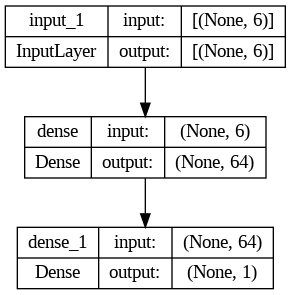

In [ ]:
from keras.utils import plot_model
plot_model(model, to_file='model.png', show_shapes=True)

In [ ]:
print('The R2 score of our prediction is %.4f' %(deepmlp.score(X_test, y_test)))

The R2 score of our prediction is -0.0511


In [ ]:
predic = model.predict(X_test)

6/6 [==============================] - 0s 3ms/step


In [ ]:
y_test = y_test.values.ravel()
predic = predic.ravel()
cek = pd.DataFrame({'Actual': y_test, 'Predicted': predic})
cek

,Actual,Predicted
0,310.397556,3.334368
1,307.339452,2.749784
2,345.565752,1.969979
3,381.243632,2.589178
4,306.829768,2.602826
...,...,...
168,322.120288,4.469174
169,336.391440,1.577029
170,326.197760,2.440297
171,307.849136,1.346129


import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(cek, *['Actual'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(cek, *['Predicted'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plots(df, colname_pairs, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * 6 * figscale, 6 * figscale))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha, ax=ax)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(cek, *[[['Actual', 'Predicted']]], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(cek, *['Actual'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(cek, *['Predicted'], **{})
chart

In [ ]:
eval = mean_squared_error(y_test, predic)

In [ ]:
eval

112368.813631284

-0.0511 dan mse = 112368.813631284.


In [ ]:
param_grid = {
    'hidden_layer_sizes': [(16, 16, 8, 8), (32, 32, 16, 16), (64, 64, 32, 32)],
    'activation': ['relu', 'tanh', 'logistic'],
    'solver': ['adam', 'sgd'],
    'max_iter': [1000, 2000, 3000]
}

In [ ]:
mod = MLPRegressor(random_state=1)

In [ ]:
grid_search = GridSearchCV(mod, param_grid, cv=5, scoring='neg_mean_squared_error')

In [ ]:
grid_search.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_base.py:174: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
/usr/local

GridSearchCV(cv=5, estimator=MLPRegressor(random_state=1),
             param_grid={'activation': ['relu', 'tanh', 'logistic'],
                         'hidden_layer_sizes': [(16, 16, 8, 8),
                                                (32, 32, 16, 16),
                                                (64, 64, 32, 32)],
                         'max_iter': [1000, 2000, 3000],
                         'solver': ['adam', 'sgd']},
             scoring='neg_mean_squared_error')

In [ ]:
bested = grid_search.best_estimator_
bested.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(hidden_layer_sizes=(64, 64, 32, 32), max_iter=1000, random_state=1)

In [ ]:
hasil = bested.predict(X_test)

In [ ]:
eror = mean_squared_error(y_test, y_pred)
rsquared = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {eror}')
print(f'R-squared (R^2) Score: {rsquared:.4f}')

Mean Squared Error: 933.5482598095565
R-squared (R^2) Score: -0.0016
